In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ロジスティク(シグモイド)関数

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin01\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

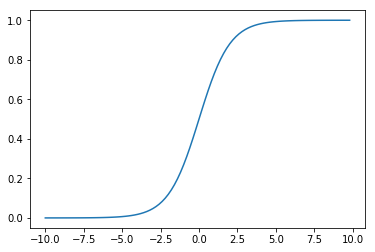

In [2]:
a = 1

def logi_func(x):
    return 1 / (1 + np.exp(-a*x))

X = np.arange(-10, 10, 0.2)
Y = logi_func(X)

plt.plot(X, Y)
plt

## ロジスティク回帰
### P(Y=1|x) = σ(w0 + w1X)

In [3]:
# データの読み込みと整形
# 日照時間をもとに晴れたかどうかを予測（"晴れ"が含まれる天気は全て晴れとする）
# 晴れを1 それ以外の転機を0とする（逆でも可）

df = pd.read_csv('./weather.csv')
df['weather'] = df['weather'].replace('(.*)晴(.*)', '1.0', regex=True)
df['weather'] = df['weather'].where(df['weather'] == '1.0', '0.0')
df['weather'] = df['weather'].astype(np.float16)

# df

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# 訓練データとテストデータの作成（ホールドアウト法）
X_train, X_test, Y_train, Y_test = train_test_split(df['sunlight'], df['weather'], test_size=0.3)

lr = LogisticRegression()
lr.fit(X_train.reshape(X_train.size, 1), Y_train)


C:\Users\Admin01\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Admin01\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
# テストデータを用いて精度を確認
print (lr.score(X_test.reshape(X_test.size, 1), Y_test))

0.8868613138686131


C:\Users\Admin01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


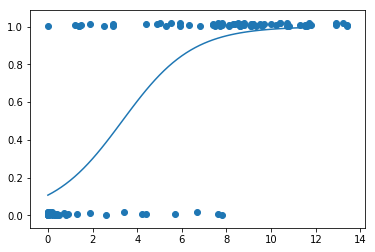

In [6]:
# 可視化

w0 = lr.intercept_[0]
w1 = lr.coef_[0,0]

x = np.arange(0, 12, 0.2)
plt.plot(x, logi_func(w0 + w1*x))

# 全てのデータをプロットすると煩雑であるため100個までプロット
plt.scatter(X_train[:100], Y_train[:100]+np.random.rand(100)/50)